In [1]:
import gudhi as gd
p = gd.read_off(off_file = 'sphere3D_2646.off')
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random




In [2]:
def smaller_sample(sample,num=500):
    '''A function that takes a smaller sample in ordet to compute with a larger maximum distance between vertices'''
    rand_numbers=np.random.choice(range(len(sample)),num,replace=False)
    return [p[i] for i in rand_numbers]

In [3]:
def transform_to_plot(sample): 
    '''Function that transforms the data in order to represent it in matplotlib'''
    return np.asarray([point[0] for point in sample]),np.asarray([point[1] for point in sample]),np.asarray([point[2] for point in sample])

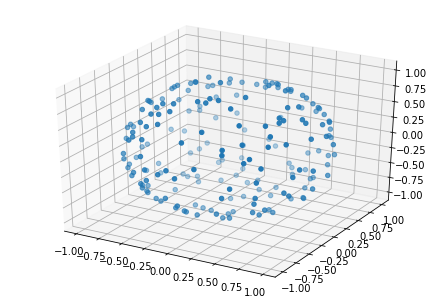

<Figure size 432x288 with 0 Axes>

In [4]:
less_points=smaller_sample(p,200)
plot_points=transform_to_plot(less_points)
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(plot_points[0],plot_points[1],plot_points[2],zdir='z')
pyplot.show()
pyplot.savefig('sample_smaller_sphere.png')

In [5]:
Rips_complex_sample = gd.RipsComplex(points =less_points  , max_edge_length=1.7)

In [6]:
Rips_simplex_tree_sample = Rips_complex_sample.create_simplex_tree(max_dimension=3) 

In [7]:
diag_Rips = Rips_simplex_tree_sample.persistence()

Deprecated parameter. It has been replaced by max_intervals


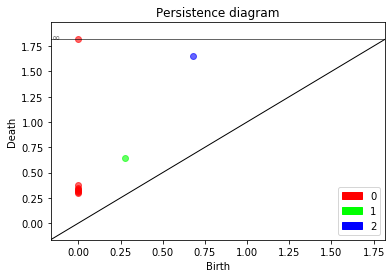

In [8]:
persistence_diagram=gd.plot_persistence_diagram(diag_Rips,legend=True, max_plots=10)
pyplot.savefig('smaller_sphere_diagram.png')

Deprecated parameter. It has been replaced by max_intervals


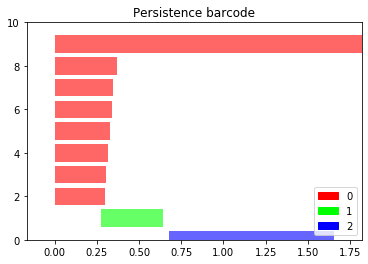

In [9]:
gd.plot_persistence_barcode(diag_Rips,max_barcodes=10, legend=True)
pyplot.savefig('smaller_sphere_barcodes.png')

In [10]:
#We add noise to see the stability of the persistence
p_noise=less_points+np.random.uniform(0,0.1,np.shape(less_points))
Rips_complex_noise = gd.RipsComplex(points =p_noise  , max_edge_length=1.7)


In [11]:
Rips_simplex_tree_noise = Rips_complex_noise.create_simplex_tree(max_dimension=3) 

In [12]:
diag_Rips_noise = Rips_simplex_tree_noise.persistence()

Deprecated parameter. It has been replaced by max_intervals


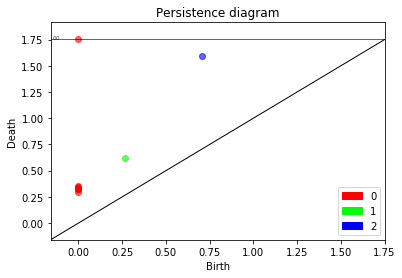

In [13]:
gd.plot_persistence_diagram(diag_Rips_noise,legend=True, max_plots=10)
pyplot.savefig('smaller_sphere_diagram_noise.png')

Deprecated parameter. It has been replaced by max_intervals


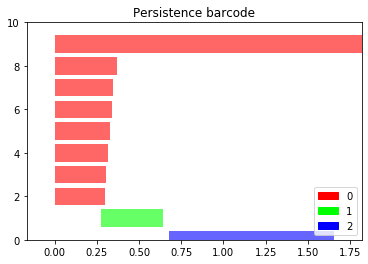

In [14]:
gd.plot_persistence_barcode(diag_Rips,max_barcodes=10, legend=True)
pyplot.savefig('smaller_sphere_barcodes_noise.png')